For using the library, it's important clone and install the project, because the repoository is local

In [2]:
!git clone https://github.com/pedronobredmc/z-transform-lib.git
!pip install -e /content/z-transform-lib/code/

Cloning into 'z-transform-lib'...
remote: Enumerating objects: 125, done.
remote: Counting objects: 100% (125/125), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 125 (delta 25), reused 62 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (125/125), 438.95 KiB | 2.89 MiB/s, done.
Resolving deltas: 100% (25/25), done.
Obtaining file:///content/z-transform-lib/code
  Preparing metadata (setup.py) ... done
  Running setup.py develop for ztransform


Now, for import the library files, the sys path must be updated

In [3]:
import sys
sys.path.append('/content/z-transform-lib/code')  # Add the directory containing ztransform to the path
from lib.ztransform import ZT, ztransform # Import from the correct location using absolute path
from lib.inverse_ztransform import inverse_ztransform

# Determine a transformada z de :

# $x[n] = (0,9)^nu[n] + (1,2)^nu[-(n+1)] = x_1[n]+x_2[n]$

In [91]:
import sympy as sp

z = sp.symbols('z', real=True)
n = sp.symbols('n', real=True)

x1 = (0.9)**n*sp.Heaviside(n)
x2 = (1.2)**n*sp.Heaviside(-n-1)

x1_z = ZT(x1, n, z).simplify()
x2_z = ZT(x2, n, z).simplify()

display(sp.Eq(sp.Symbol('x_1[z]'), x1_z))
display(sp.Eq(sp.Symbol('x_2[z]'), x2_z))

Eq(x_1[z], z/(z - 0.9))

Eq(x_2[z], Piecewise((1/(1 - z), Abs(z) < 1), (Sum(z**m, (m, 0, oo)), True))*Heaviside(-n - 1))

In [89]:
x_z = x1_z + x2_z
display(sp.Eq(sp.Symbol('x[z]'), x_z))

Eq(x[z], z/(z - 0.9) + Piecewise((1/(1 - z), Abs(z) < 1), (Sum(z**m, (m, 0, oo)), True))*Heaviside(-n - 1))

Infelizmente a biblioteca não lida muito bem com sinais anticausais no tempo devido as limitações do somatório em python. Para comparar, usando o somatório da transformada:

In [99]:
x_teste = (1.2)**n*sp.Heaviside(-n-1)
x_teste_z = sp.summation(x_teste * z**(-n), (n, -sp.oo, -1))
display(x_teste_z.simplify().doit())
#

Sum(1.2**n*Heaviside(-n - 1)/z**n, (n, -oo, -1))

Dessa forma, pelas definições da transformada bilateral e tendo que a região comum na qual tanto X1[z] e X2[z] convergem é 0,9 < |z| < 1,2 (Fig. 5.27b). Logo,

In [104]:
x2_z = -z /(z-1.2)
x_z = (x1_z + x2_z).simplify()
display(sp.Eq(sp.Symbol('x[z]'), x_z))


Eq(x[z], -0.3*z/((z - 1.2)*(z - 0.9)))

A sequência x[n] e a RDC de X[z] estão mostradas nos gráficos abaixo

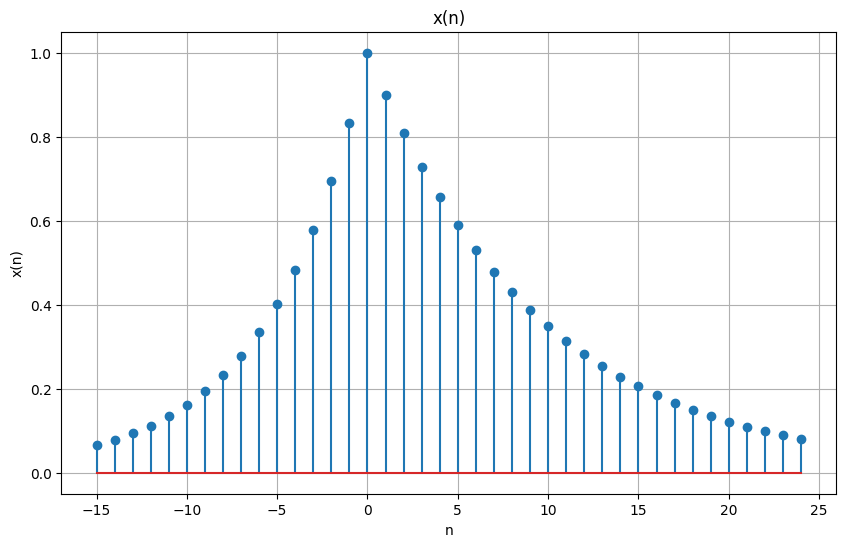

In [129]:
import numpy as np
import matplotlib.pyplot as plt

n_time = np.arange(-15, 25)
def u(n):
    return np.where(n >= 0, 1, 0)

x_time = (0.9)**n_time*u(n_time) + (1.2)**n_time*u(-n_time-1)

plt.figure(figsize=(10, 6))
plt.stem(n_time, x_time)
plt.xlabel('n')
plt.ylabel('x(n)')
plt.title('x(n)')
plt.grid(True)
plt.show()

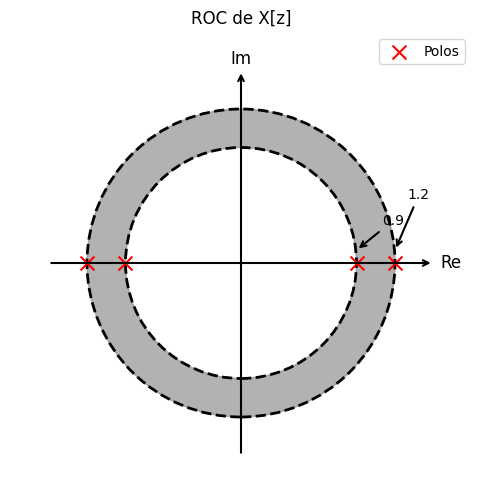

In [190]:
from matplotlib.patches import Wedge

# Criar a figura e os eixos
fig, ax = plt.subplots(figsize=(6,6))

# Criar a coroa circular preenchida (anel entre 0.9 e 1.2)
wedge = Wedge((0, 0), 1.2, 0, 360, width=0.3, color='gray', alpha=0.6)
ax.add_patch(wedge)

# Criar os círculos delimitadores da ROC (tracejados)
circle_inner = plt.Circle((0, 0), 0.9, color='black', fill=False, linestyle='dashed', linewidth=2)
circle_outer = plt.Circle((0, 0), 1.2, color='black', fill=False, linestyle='dashed', linewidth=2)
ax.add_patch(circle_inner)
ax.add_patch(circle_outer)

# Adicionar polos como "X" no eixo real (exemplo em ±0.9 e ±1.2)
ax.scatter([0.9, -0.9, 1.2, -1.2], [0, 0, 0, 0], color='red', marker='x', s=100, label='Polos')

# Adicionar setas para indicar os módulos dos polos
ax.annotate("0.9", xy=(0.9, 0.1), xytext=(1.1, 0.3),
            arrowprops=dict(arrowstyle="->", linewidth=1.5))
ax.annotate("1.2", xy=(1.2, 0.1), xytext=(1.3, 0.5),
            arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Adicionar setas dos eixos
ax.annotate("", xy=(1.5, 0), xytext=(-1.5, 0), arrowprops=dict(arrowstyle="->", linewidth=1.5))
ax.annotate("", xy=(0, 1.5), xytext=(0, -1.5), arrowprops=dict(arrowstyle="->", linewidth=1.5))

# Adicionar rótulos dos eixos
ax.text(1.55, 0, "Re", fontsize=12, verticalalignment='center')
ax.text(0, 1.55, "Im", fontsize=12, horizontalalignment='center')

# Configurar os limites e ocultar eixos
ax.set_xlim(-1.8, 1.8)
ax.set_ylim(-1.8, 1.8)
ax.set_xticks([])
ax.set_yticks([])
ax.set_aspect('equal')
ax.set_frame_on(False)

# Exibir o gráfico
plt.title('ROC de X[z]')
plt.legend()
plt.show()